# K-Means  

### K-Means 的演算過程:
* 先隨機從資料中選出K個instance 作為初始的cluster centroid
* 重複以下操作, 直到各centroid的位置不再移動為止:
    * 將每筆資料指派給最靠近的centroid
    * 更新centroid位置為，新的centroid的位置為指派給該centroid的所有資料之平均  

---- 

## Silhouette distance   
要分幾群才合適
用"群跟群的最短距離平均"跟"群內平均距離"做評估  
就能評估分群的效果如何  

----

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = load_iris()
x = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## scikit learn 中的KMeans 各參數的意義: (參考 https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html )
* n_clusters: 指定群聚的數量
* max_iter: 最大迭代次數
* n_init: 用不同初始化的centroids運行的次數，最後會從中選出一個最好的結果，default為10次
* init: 初始化的方式，有random 及 kmeans++ 兩種，詳見上述連結說明
* algorithm: "auto" "full" or "elkan"，用預設的"auto"即可 

In [7]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_pred = kmeans.fit_predict(x)
clusters_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

inertia: within cluster sum of squres, 各sample到各該群的centroid的距離之平方和，用來評估cluster的成效，越大代表越差

In [4]:
kmeans.inertia_

78.85144142614601

### 畫出cluster_centers_ 群心, 為了視覺化方便, 只取2,3維當作x,y座標

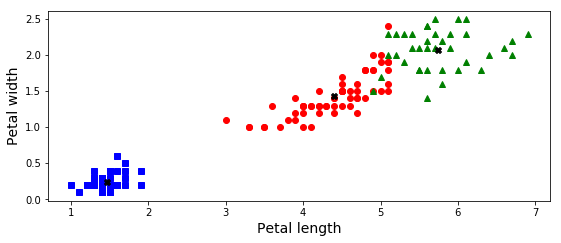

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [9]:
plt.figure(figsize=(9, 3.5))
plt.plot(x[clusters_pred==0, 2], x[clusters_pred==0, 3], "ro", label="Iris-Setosa")
plt.plot(x[clusters_pred==1, 2], x[clusters_pred==1, 3], "bs", label="Iris-Versicolor")
plt.plot(x[clusters_pred==2, 2], x[clusters_pred==2, 3], "g^", label="Iris-Virginica")
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], color='k', marker='X', zorder=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.show()
kmeans.cluster_centers_

#### 如何決定K? 可用inertia做評估。以下利用scikit learn的make_blobs建立一個有四個中心的共2000筆的假資料作為範例:

In [10]:
# 先指定centroids的位置及各cluster的標準差
blob_centers = np.array(
    [[ -0.2,  2.3],
     [1.5 ,  2.3],
     [2.8,  2.8],
     [2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

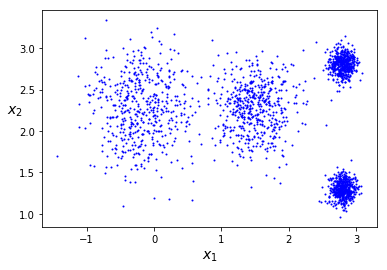

In [12]:
plt.scatter(X[:, 0], X[:, 1], c='b', s=1)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()

#### 用inertias找出合適的k

In [13]:
# k = 1~9 做九次kmeans, 並將每次結果的inertia收集在一個list裡
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

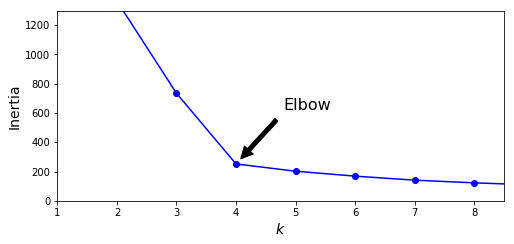

In [14]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
#標註
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])

plt.show()

# Hierarchical clustering
若是以下的 code 有不清楚的部分，請參考[連結](https://haojunsui.github.io/2016/07/16/scipy-hac/)
``` python
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
```  
好處是隨時可以重新分群  

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

variables = ['X', 'Y', 'Z']
labels = ['ID_'+str(i) for i in range(5)]
print(labels)
# set seed to remain the same sample numbers
np.random.seed(42)
X = np.random.random_sample([len(labels), len(variables)])
df = pd.DataFrame(X, columns=variables, index=labels)
df

['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']


,X,Y,Z
ID_0,0.374540,0.950714,0.731994
ID_1,0.598658,0.156019,0.155995
ID_2,0.058084,0.866176,0.601115
ID_3,0.708073,0.020584,0.969910
ID_4,0.832443,0.212339,0.181825


### 1. build distance matrix by calculating pairwise distance

In [38]:
### 1. distance matrix 
from scipy.spatial.distance import pdist

# pairwise distance
# 我們有五個樣本，每兩兩成對計算距離，會得到 10 個距離 (C 5 取 2 = 10)
row_dist = pdist(df, metric='euclidean')
row_dist


array([1.00675001, 0.35273321, 1.01636084, 1.02837666, 0.99733501,
       0.83232927, 0.24185582, 1.12850367, 1.09678572, 0.82055806])

### 2. build hierarchy
用linkage()實現層次聚類  
使用 'complete'實現距離的計算  
其他還有 'ward','single','average'  

In [20]:
from scipy.cluster.hierarchy import linkage
hc = linkage(row_dist, 
             method='complete')
# row: [idx_first, idx_second, distance, sample count]
# 第一步:算法決定合併第 1 群與 第 4 群，因為這兩群彼此的距離為 0.24，總共合併了兩個 sample
# 第二步:算法決定合併第 0 群與 第 2 群，因為這兩群彼此的距離為 0.35，總共合併了兩個 sample
# 第三步:算法決定合併第 3 群與 第 5 群 (這邊請注意，原先 data 只有五群資料，第 0 群到 第 4 群。所以這邊要合併的第 5 群，指得是第一步合併的那群
# 第四步:算法決定合併第 6 群與 第 7 群 (同理，這邊指的是，合併第二步那群 與 第三步的那群)

# 以上就是階層分析的步驟，看下方 dendrogram 的圖會更清楚
hc

array([[1.        , 4.        , 0.24185582, 2.        ],
       [0.        , 2.        , 0.35273321, 2.        ],
       [3.        , 5.        , 0.83232927, 3.        ],
       [6.        , 7.        , 1.12850367, 5.        ]])

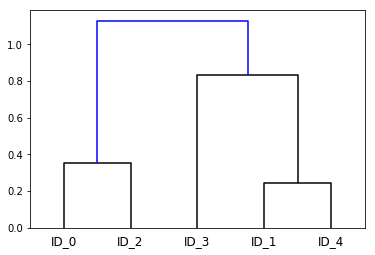

In [34]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import set_link_color_palette
#?dendrogram
# 繪製樹狀圖，藍色線 代表這兩群的距離超過某個限度，可自己定義 color_threshold
set_link_color_palette(['black'])

row_dendr = dendrogram(hc,
                       labels=labels,
                       color_threshold=0.9 #可改動，看看線的顏色變化
                      )

### 4. Decide the number of clusters by various criteria
決定分群的結果  
maxclust: t=3分三群, [id0,id2] [3] [1,4]  -> 用[1,2,1,3,2] 表示 {id0:1 , id1:2 , id2:1 , id3:3 , id4:2}  
也可用
distance: t=0.5, y軸距離值拿來作切分條件  

In [35]:
from scipy.cluster.hierarchy import fcluster
#?fcluster
# 不同的　criterion 會有不同的參數，t=3，限制最多分成三群
# ID_0 與 ID_2 被分為第一群
# ID_1 與 ID_4 被分為第二群
# ID_3 則是獨立一群
fcluster(hc, criterion='maxclust', t=3)

array([1, 2, 1, 3, 2], dtype=int32)

In [37]:
#以距離分群
fcluster(hc, criterion='distance', t=0.5)

array([1, 2, 1, 3, 2], dtype=int32)

array([1, 2, 1, 2, 2], dtype=int32)